## Importing Essential Libraries

In [1]:
# Numerical and Data Manipulation
import numpy as np
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Scikit-learn Pipeline and Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

# Evaluation Metrics
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    accuracy_score,
    auc,
    roc_curve,
)

from sklearn.model_selection import (
    train_test_split,  # To split data into training and test sets
    GridSearchCV,
    learning_curve,
)

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Data Preprocessing
from sklearn.impute import SimpleImputer  # To fill in missing values
from sklearn.preprocessing import (
    StandardScaler,  # To standardize features (zero mean, unit variance)
    OneHotEncoder,  # To encode categorical variables as binary vectors
)

import warnings

warnings.filterwarnings("ignore")  # Ignoring warning messages

## Reading the data

In [2]:
df = pd.read_csv("loan_data.csv")

## 📄 Dataset Attributes
The dataset contains the following features:

person_age (float) – Age of the loan applicant.

person_gender (object) – Gender of the applicant (e.g., male, female).

person_education (object) – Highest education level attained (e.g., High School, Bachelor, Associate).

person_income (float) – Annual income of the applicant.

person_emp_exp (float) – Years of employment experience.

person_home_ownership (object) – Type of home ownership (e.g., RENT, MORTGAGE).

loan_amnt (float) – Amount of the loan requested.

loan_intent (object) – Purpose of the loan (e.g., MEDICAL, PERSONAL, DEBTCONSOLIDATION).

loan_int_rate (float) – Interest rate of the loan.

loan_percent_income (float) – Ratio of loan amount to income.

cb_person_cred_hist_length (int) – Length of credit history (in years).

credit_score (int) – Applicant’s credit score.

previous_loan_defaults_on_file (object) – Whether applicant has default history on record (Yes/No).

loan_status (int) – Target variable: 1 if loan was approved, 0 otherwise.



## Exploratory Data Analysis (EDA)

In [3]:
print("Looking at the dataset:")
df.head(8)

Looking at the dataset:


,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,male,Bachelor,78745.0,0.0,RENT,9600.0,MEDICAL,11.97,0.12,2,623,Yes,0
1,26.0,male,Bachelor,79943.0,7.0,MORTGAGE,7000.0,DEBTCONSOLIDATION,9.63,0.09,2,624,No,0
2,24.0,male,Associate,79471.0,1.0,RENT,9600.0,DEBTCONSOLIDATION,8.49,0.12,2,651,No,0
3,23.0,male,Associate,91653.0,0.0,MORTGAGE,25000.0,DEBTCONSOLIDATION,11.12,0.27,4,624,No,0
4,24.0,male,High School,92020.0,2.0,MORTGAGE,15000.0,PERSONAL,10.38,0.16,2,608,Yes,0
5,22.0,NaN,Associate,91732.0,0.0,MORTGAGE,6700.0,VENTURE,11.83,0.07,2,602,Yes,0
6,25.0,male,Associate,101670.0,3.0,RENT,10000.0,DEBTCONSOLIDATION,11.01,0.10,4,568,Yes,0
7,25.0,male,Bachelor,101952.0,5.0,RENT,10000.0,HOMEIMPROVEMENT,13.49,0.10,2,713,Yes,0


In [4]:
print(f"dataset shape: \n:{df.shape}")

dataset shape: 
:(22353, 14)


In [5]:
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]

In [6]:
print("Target distribution:\n", y.value_counts())

Target distribution:
 loan_status
0    12353
1    10000
Name: count, dtype: int64


In [7]:
print(f"dataset information:\n {df.info()}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22353 entries, 0 to 22352
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      22325 non-null  float64
 1   person_gender                   22307 non-null  object 
 2   person_education                22273 non-null  object 
 3   person_income                   22298 non-null  float64
 4   person_emp_exp                  22333 non-null  float64
 5   person_home_ownership           22286 non-null  object 
 6   loan_amnt                       22325 non-null  float64
 7   loan_intent                     22312 non-null  object 
 8   loan_int_rate                   22348 non-null  float64
 9   loan_percent_income             22353 non-null  float64
 10  cb_person_cred_hist_length      22353 non-null  int64  
 11  credit_score                    22353 non-null  int64  
 12  previous_loan_defaults_on_file  

In [8]:
print(f"Missing values:\n{df.isnull().sum()}")

Missing values:
person_age                        28
person_gender                     46
person_education                  80
person_income                     55
person_emp_exp                    20
person_home_ownership             67
loan_amnt                         28
loan_intent                       41
loan_int_rate                      5
loan_percent_income                0
cb_person_cred_hist_length         0
credit_score                       0
previous_loan_defaults_on_file     0
loan_status                        0
dtype: int64


In [9]:
print("Description of Numerical Features:")
X.describe()

Description of Numerical Features:


,person_age,person_income,person_emp_exp,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score
count,22325.000000,2.229800e+04,22333.000000,22325.000000,22348.000000,22353.000000,22353.000000,22353.000000
mean,29.789160,8.761846e+04,7.371423,10461.699037,11.291984,0.144547,7.197021,636.157071
std,6.689884,8.695762e+04,6.791580,6737.614116,3.107326,0.092547,4.317930,50.541759
min,20.000000,8.000000e+03,0.000000,500.000000,5.420000,0.000000,2.000000,390.000000
25%,25.000000,4.809975e+04,2.000000,5000.000000,8.900000,0.070000,4.000000,605.000000
50%,28.000000,7.312650e+04,6.000000,9976.000000,11.010000,0.120000,6.000000,643.000000
75%,33.000000,1.087648e+05,10.000000,14500.000000,13.490000,0.200000,9.000000,673.000000
max,144.000000,7.200766e+06,124.000000,35000.000000,20.000000,0.620000,30.000000,850.000000


Creating the Correlation Heatmap:


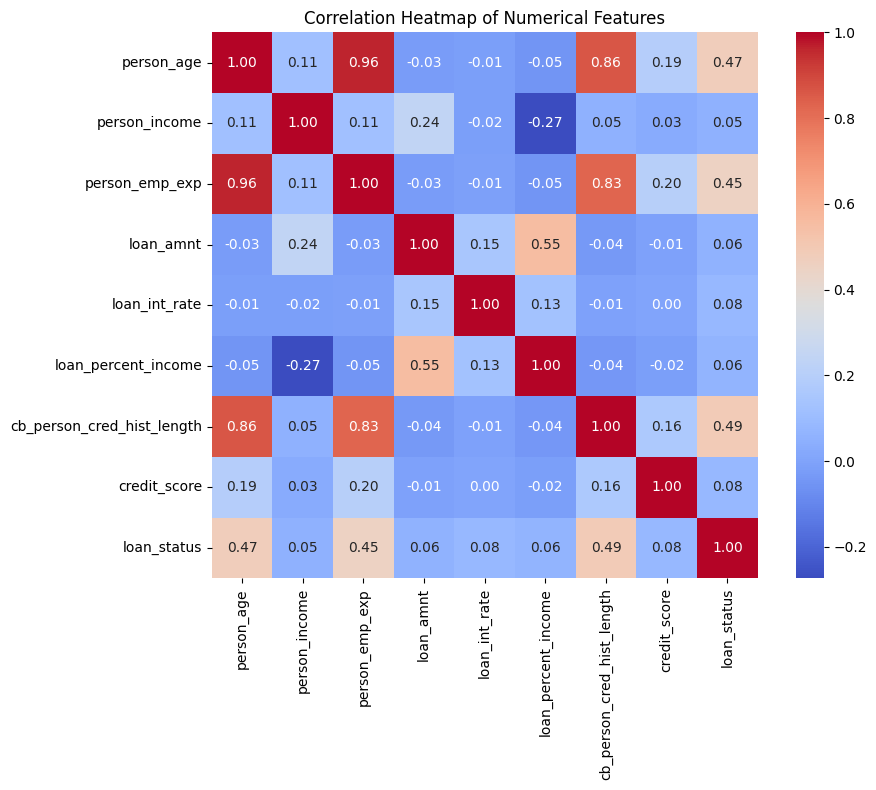

In [10]:
print("Creating the Correlation Heatmap:")
plt.figure(figsize=(10, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.tight_layout()
plt.show()

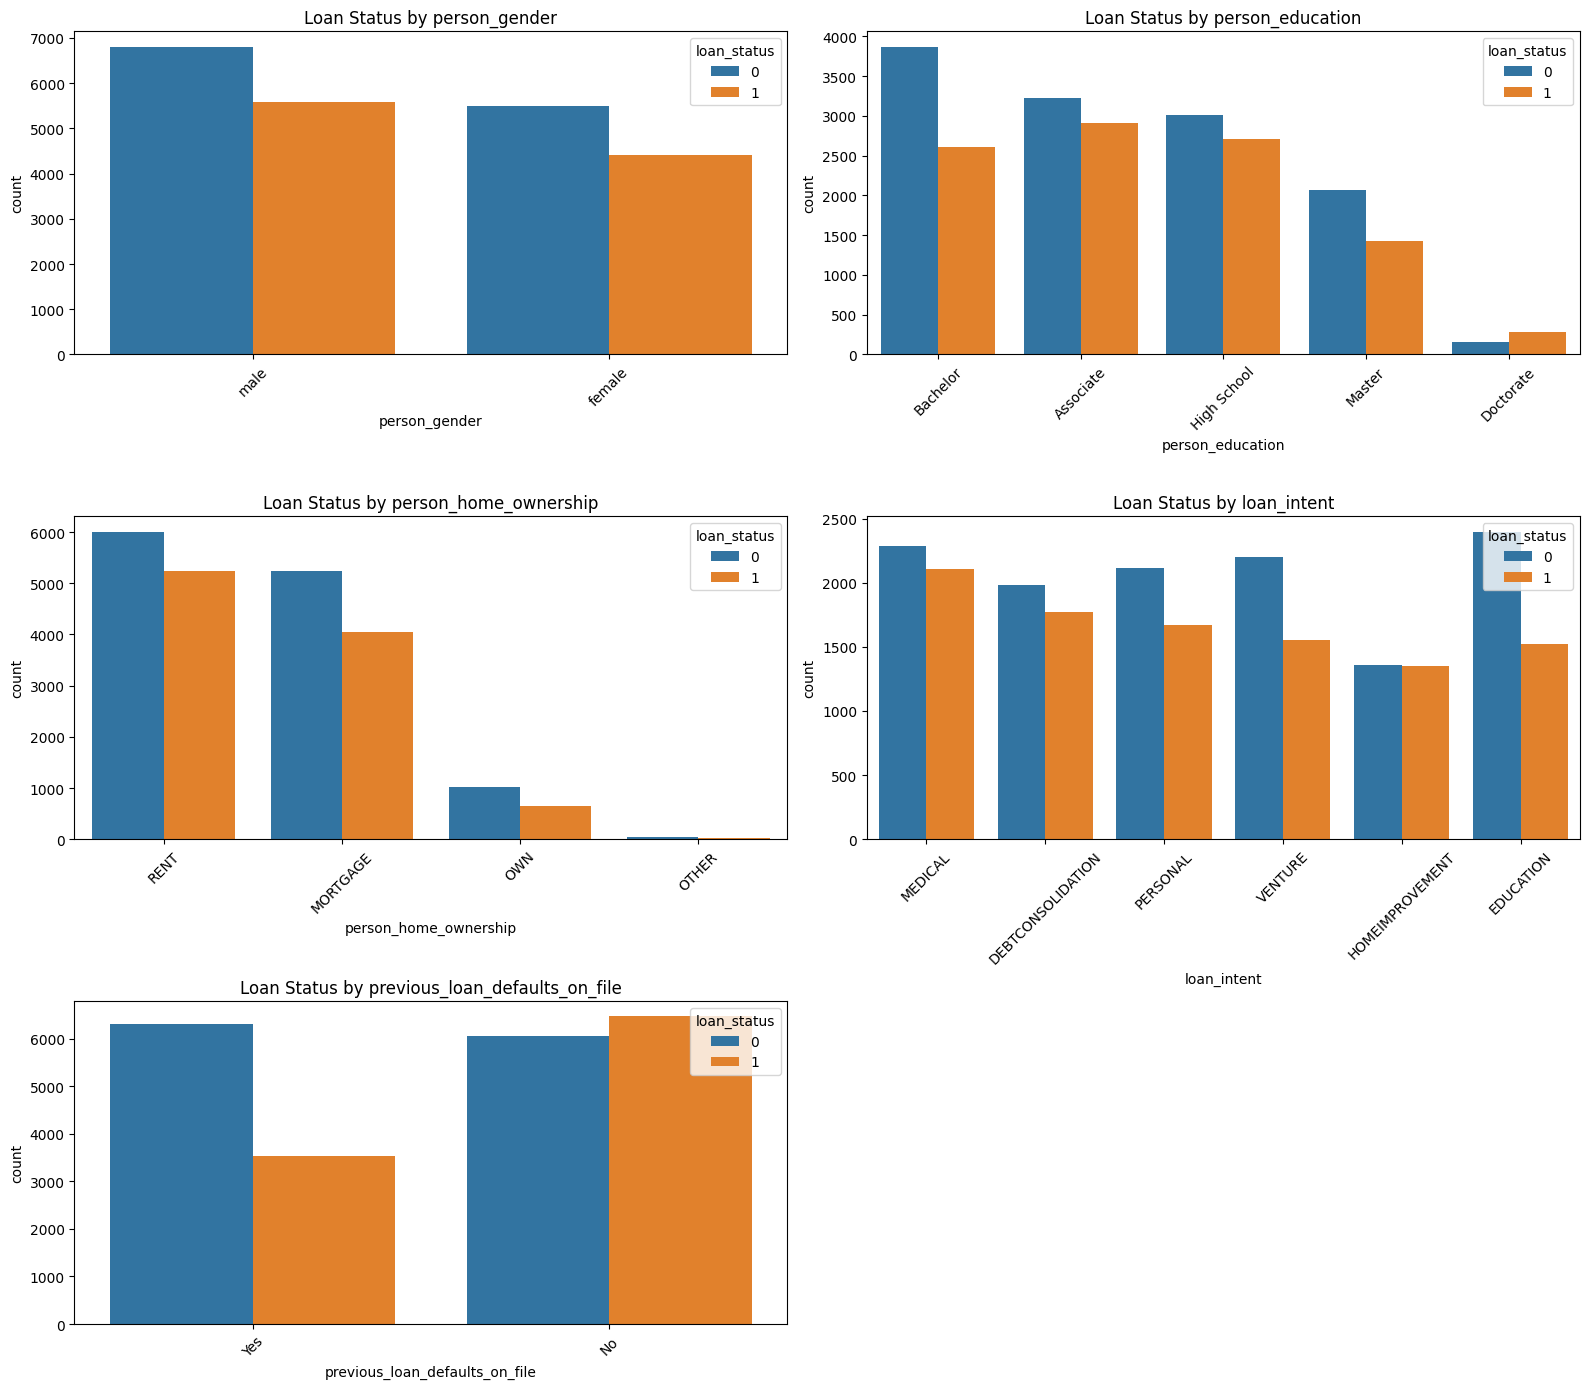

In [11]:
categorical_features = [
    "person_gender",
    "person_education",
    "person_home_ownership",
    "loan_intent",
    "previous_loan_defaults_on_file",
]

fig, axes = plt.subplots(3, 2, figsize=(16, 14))
axes = axes.flatten()

for i, feature in enumerate(categorical_features):
    sns.countplot(data=df, x=feature, hue="loan_status", ax=axes[i])
    axes[i].set_title(f"Loan Status by {feature}")
    axes[i].tick_params(axis="x", rotation=45)

if len(categorical_features) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

# Pre_processing and Pipeline definition

In [12]:
categorical_features = [
    var for var in df.columns if df[var].dtypes == "object"
]  # Identify categorical features
numerical_features = [
    var for var in df.columns if df[var].dtypes != "object"
]  # Identify numerical features
numerical_features.remove("loan_status")

print(f"Categorical columns:\n {categorical_features}")
print(f"Numerical columns:\n {numerical_features}")

Categorical columns:
 ['person_gender', 'person_education', 'person_home_ownership', 'loan_intent', 'previous_loan_defaults_on_file']
Numerical columns:
 ['person_age', 'person_income', 'person_emp_exp', 'loan_amnt', 'loan_int_rate', 'loan_percent_income', 'cb_person_cred_hist_length', 'credit_score']


In [13]:
df["person_gender"].value_counts()

person_gender
male      12402
female     9905
Name: count, dtype: int64

In [14]:
# numerical features: Imputation and Scaling
numerical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="mean"),
        ),  # Replace missing values with column mean
        ("scaler", StandardScaler()),  # Standardize features (zero mean, unit variance)
    ]
)

# categorical features: Imputation and One-Hot Encoding
categorical_transformer = Pipeline(
    steps=[
        (
            "imputer",
            SimpleImputer(strategy="most_frequent"),
        ),  # Replace missing values with most frequent category
        (
            "onehot",
            OneHotEncoder(handle_unknown="ignore"),
        ),  # Convert categories to one-hot vectors, ignore unseen categories
    ]
)

In [15]:
# Create a ColumnTransformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numerical_transformer, numerical_features),
        ("cat", categorical_transformer, categorical_features),
    ],
    remainder="drop",  # Drop columns not specified
    verbose_feature_names_out=True,  # To get clean feature names out of OneHotEncoder
)

## Spliting the Training and Test Sets

In [16]:
# Split the dataset into training and testing sets (80/20), stratified by the target
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=616
)

# Display the shapes of the splits
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (17882, 13)
y_train shape: (17882,)
X_test shape:  (4471, 13)
y_test shape:  (4471,)


In [17]:
pipe = Pipeline(
    [
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression()),  # Placeholder
    ]
)

In [18]:
param_grid = [
    {
        "classifier": [LogisticRegression(solver="saga", max_iter=1000)],
        "classifier__C": [0.01, 0.1, 1, 10],  # Learning Rate
        "classifier__penalty": ["l1", "l2"],  # Lasso and Ridge Regularizers
    },
    {
        "classifier": [RandomForestClassifier()],
        "classifier__n_estimators": [50, 100],
        "classifier__max_depth": [5, 10],  # (reduce overfitting)
        "classifier__max_features": ["sqrt"],
        "classifier__class_weight": ["balanced"],
    },
]

In [19]:
# Grid search with both LogisticRegression and RandomForestClassifier
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring="accuracy",  # metric
    n_jobs=-1,
)
# Fit the grid search
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer()),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_exp',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length',
                                                                          'credit_score']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',...
             n_jobs=-1,
             param_grid=[{'classifier': [LogisticRegression(max_iter=1000,
                                                            solver='saga')],
                          'classifier__C': [0.01, 0.1, 1, 10],
                          'classifier__penalty': ['l1', 'l2']},
                         {'classifier': [RandomForestClassifier()],
                          'classifier__class_weight': ['balanced'],
                          'classifier__max_depth': [5, 10],
                          'classifier__max_features': ['sqrt'],
                          'classifier__n_estimators': [50, 100]}],
             scoring='accuracy')

In [20]:
print("Best parameters:\n", grid.best_params_)
print("Best model:\n", grid.best_estimator_)
print("Best cross-validation score:\n", grid.best_score_)

# Predict using the best model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)

Best parameters:
 {'classifier': RandomForestClassifier(), 'classifier__class_weight': 'balanced', 'classifier__max_depth': 10, 'classifier__max_features': 'sqrt', 'classifier__n_estimators': 100}
Best model:
 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_exp',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
               

## Final Model Evaluation and Visualization

Test Accuracy:
 84.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.89      0.86      2471
           1       0.85      0.78      0.81      2000

    accuracy                           0.84      4471
   macro avg       0.84      0.83      0.84      4471
weighted avg       0.84      0.84      0.84      4471



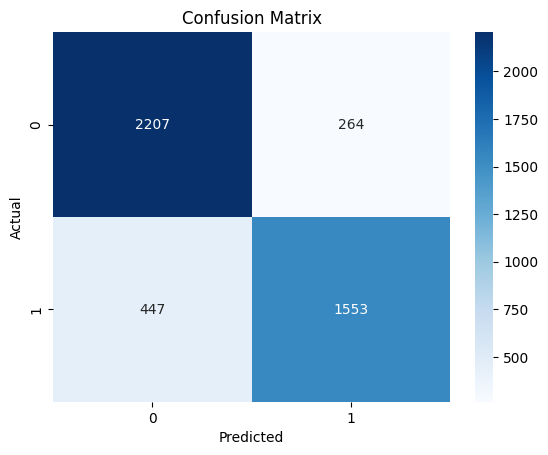

In [21]:
print(f"Test Accuracy:\n {accuracy_score(y_test, y_pred) * 100:.2f}%")
print(f"Classification Report:\n {classification_report(y_test, y_pred)}")

#  Confusion Matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

## learning_curve

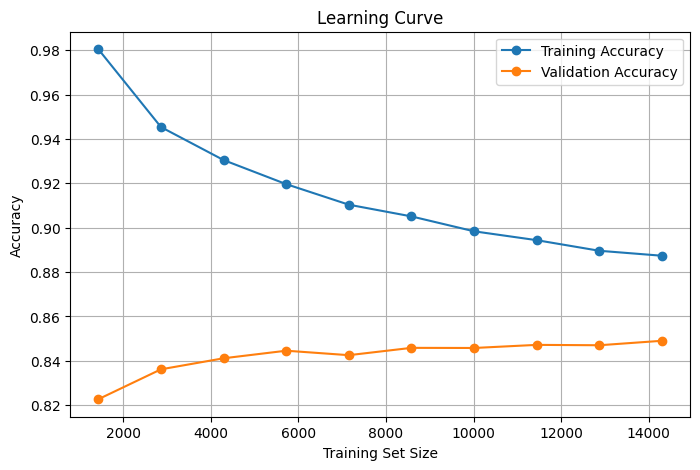

In [22]:
train_sizes, train_scores, val_scores = learning_curve(
    estimator=best_model,
    X=X_train,
    y=y_train,
    train_sizes=np.linspace(0.1, 1.0, 10),
    cv=5,
    scoring="accuracy",
    n_jobs=-1,
)

train_mean = np.mean(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)

plt.figure(figsize=(8, 5))
plt.plot(train_sizes, train_mean, label="Training Accuracy", marker="o")
plt.plot(train_sizes, val_mean, label="Validation Accuracy", marker="o")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(True)
plt.show()